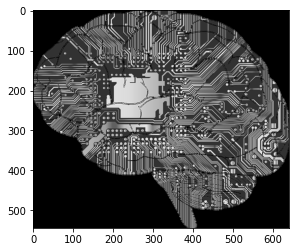

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread('/content/drive/My Drive/Phương Thảo/5.CNN/image.png', cv2.IMREAD_UNCHANGED)    
rgb_weights = [0.2989, 0.5870, 0.1140]

grayscale_image = np.dot(img[...,:3], rgb_weights)
plt.imshow(grayscale_image, cmap=plt.get_cmap("gray"))

In [32]:
# construct the Sobel x-axis kernel
sobelX = np.array((
	[-1, 0, 1],
	[-2, 0, 2],
	[-1, 0, 1]), dtype="int")
# construct the Sobel y-axis kernel
sobelY = np.array((
	[-1, -2, -1],
	[0, 0, 0],
	[1, 2, 1]), dtype="int")

In [33]:
#Tính tích chập 2 chiều.
def conv2d(X, F, s = 1, p = 0):
    """
    X: Ma trận đầu vào
    F: Ma trận bộ lọc
    s: Bước trượt
    p: Độ rộng lề thêm vào
    """
    #Input
    (w1, h1) = X.shape
    #Kernel
    f = F.shape[0]
    #Output
    w2 = int((w1 + 2*p - f)/s) + 1
    h2 = int((h1 + 2*p - f)/s) + 1
    Y = np.zeros((w2, h2))
    #Padding
    X_pad = np.pad(X, pad_width = p, mode = 'constant', constant_values = 0)
    for i in range(w2):
        for j in range(h2):
            idw = i*s
            idh = j*s
            Y[i, j] = np.abs(np.sum(X_pad[idw:(idw+f), idh:(idh+f)]*F))
    return Y


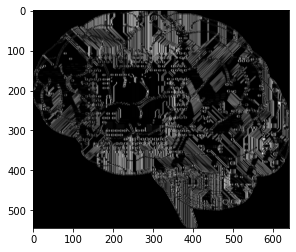

In [36]:
Y1 = conv2d(grayscale_image, sobelX, s = 1, p = 1)
plt.imshow(Y1, cmap=plt.get_cmap("gray"))

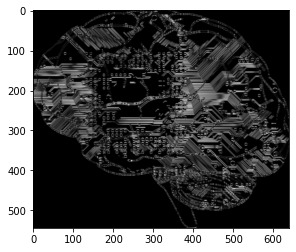

In [37]:
Y2 = conv2d(grayscale_image, sobelY, s = 1, p = 1)
plt.imshow(Y2, cmap=plt.get_cmap("gray"))

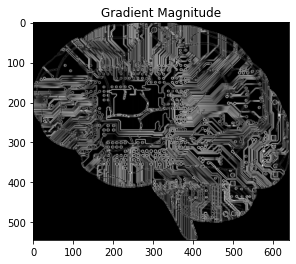

In [38]:
gradient_magnitude = np.sqrt(np.square(Y1) + np.square(Y2))

plt.imshow(gradient_magnitude, cmap='gray')
plt.title("Gradient Magnitude")
plt.show()